# Visualizing Video Games Sales Data

In this code-along, we'll use ggplot2 to visualize sales of popular video games in North America, Europe, and Japan.

The dataset used here is a subset of the "Video Games Sales Data" dataset available in Workspace. The dataset was originally [sourced from Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales).

![](dataset-video-games-sales-data.png)


- Every video game in this dataset has at least 100k global sales.
- We'll look at games from some of the most popular desktop consoles in the [4th to 8th console generations](https://en.wikipedia.org/wiki/Home_video_game_console_generations).
- Since the dataset is from Kaggle, the trustworthiness is questionable. This is for fun, not for real-world business decisions.

## Loading packages

In this code-along, we'll use `readr` to import the dataset, `dplyr` and `forcats` to manipulate the data, and `ggplot2` to visualize the data.

#### Instructions

- Load the `readr`, `dplyr`, `forcats` and `ggplot2` packages.

In [1]:
# Load readr, dplyr, forcats, ggplot2
library("readr")
library("dplyr")
library("forcats")
library("ggplot2")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




The following lines of code make it easier to see the visualizations during the webinar.

In [2]:
# Set the default figure font size to 20 (and use the gray theme for plot colors)
theme_set(theme_gray(20))

# Display plots in the workspace with a width of 10 inches and a height of 7 inches
opts <- options(repr.plot.width = 10, repr.plot.height = 8)

## Import the dataset

The dataset is stored in a CSV file named `vgsales.csv` in the `data` directory.

#### Instructions

- Read the CSV file "data/vgsales.csv". Assign the result to `vgsales`.
- Glimpse at the column information in `vgsales`.

In [3]:
# Read the CSV file "data/vgsales.csv"
vgsales <- read.csv("data/vgsales.csv")

# Glimpse the result
glimpse(vgsales)

Rows: 9,989
Columns: 9
$ Name                <chr> "Wii Sports", "Mario Kart Wii", "Wii Sports Resort…
$ Year                <int> 2006, 2008, 2009, 2006, 2009, 2007, 2009, 2010, 20…
$ Platform            <chr> "Wii", "Wii", "Wii", "Wii", "Wii", "Wii", "Wii", "…
$ Platform_Generation <chr> "7th", "7th", "7th", "7th", "7th", "7th", "7th", "…
$ Platform_Company    <chr> "Nintendo", "Nintendo", "Nintendo", "Nintendo", "N…
$ NA_Sales            <dbl> 41.49, 15.85, 15.75, 14.03, 14.59, 8.94, 9.09, 14.…
$ EU_Sales            <dbl> 29.02, 12.88, 11.01, 9.20, 7.06, 8.03, 8.59, 4.94,…
$ JP_Sales            <dbl> 3.77, 3.79, 3.28, 2.93, 4.70, 3.60, 2.53, 0.24, 0.…
$ Global_Sales        <dbl> 82.74, 35.82, 33.00, 29.02, 28.62, 22.72, 22.00, 2…


#### Data dictionary

- `Name`: The name of the game.
- `Year`: The year that the game was released on the platform.
- `Platform`: The name of the console platform that the games was released on.
- `Platform_Generation`: The console generation of the platform.
- `Platform_Company`: The company that made the console platform.
- `NA_Sales`: Millions of units sold on that platform in North America.
- `EU_Sales`: Millions of units sold on that platform in Europe.
- `JP_Sales`: Millions of units sold on that platform in Japan.
- `Global_Sales`: Millions of units sold on that platform globally.

## Drawing bar plots

### What are the top selling video games in the dataset?

Let's start by visualizing which games in the dataset were the top sellers. Since we want to plot a numeric variable (`Global_Sales`), split by a categorical variable (`Name`), a bar plot is the ideal choice.

There's a slight catch: some video games are available on multiple platforms. Look at the rows of the dataset for *Grand Theft Auto V* to see this.

#### Instructions

- Using `vgsales`, filter for rows where `Name` equals `"Grand Theft Auto V"`.

In [4]:
# Using vgsales, filter for rows where Name equals "Grand Theft Auto V"
df <- vgsales %>%
	filter(Name == "Grand Theft Auto V")

We need to get the total sales for each video game aross all platforms, then get the top 10 sellers.

#### Instructions

- Using `vgsales`, group by `Name`, then summarize to calculate `Total_Global_Sales` as the sum of `Global_Sales`. Assign to `global_sales_by_name`.
- Slice `global_sales_by_name` to get the top 10 rows by maximum `Total_Global_Sales`. Assign to `top_global_sales_by_name`.

In [5]:
# Using vgsales, group by Name, then summarize to calculate Total_Global_Sales as the sum of Global_Sales
global_sales_by_name <- vgsales %>%
	group_by(Name) %>%
	summarize(Total_Global_Sales = sum(Global_Sales))


# Slice global_sales_by_name for top 10 rows by maximum Total_Global_Sales
top_global_sales_by_name <- global_sales_by_name %>%
	slice_max(order_by = Total_Global_Sales, n=10)


# See the result
top_global_sales_by_name

Name,Total_Global_Sales
<chr>,<dbl>
Wii Sports,82.74
Grand Theft Auto V,54.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00
Call of Duty: Modern Warfare 3,29.11
Wii Play,29.02
Call of Duty: Black Ops,28.77
New Super Mario Bros. Wii,28.62
Call of Duty: Black Ops II,28.19


Now we can draw a bar plot of `Total_Global_Sales` versus `Name`. Since the data is already summarized (one game per row), ggplot2 refers to this type of bar plot as a "column plot".

#### Instructions

- Using `top_global_sales_by_name`, plot `Total_Global_Sales` versus `Name`.
- Add a column geom.

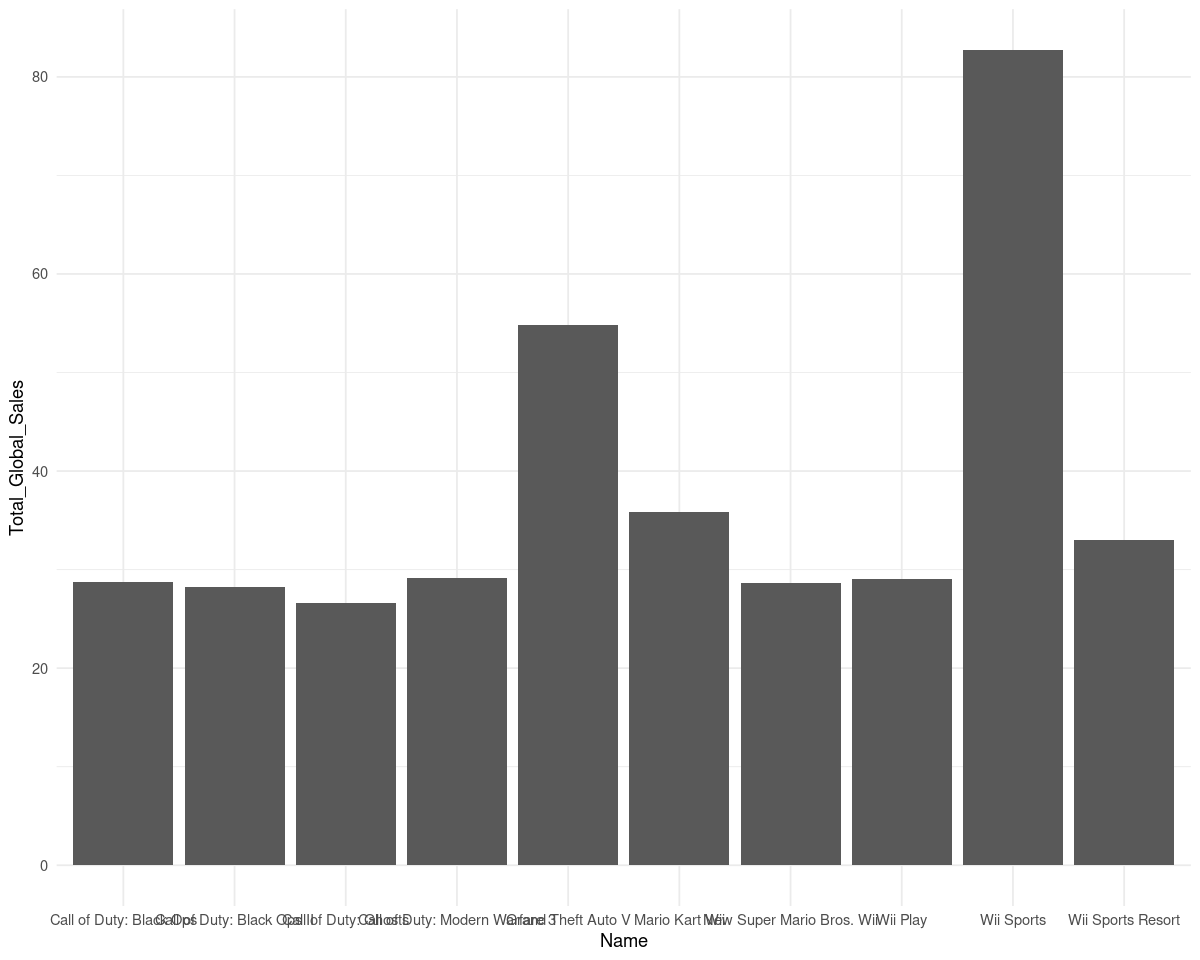

In [6]:
# Using top_global_sales_by_name, plot Total_Global_Sales versus Name
# Add a column geom
ggplot(top_global_sales_by_name, aes(x= Name, y= Total_Global_Sales))+
	geom_col() + 
	theme_minimal()


This is a good start, but the game name labels are overlapping. We can flip the axis coordinates to solve this.

#### Instructions

- Redraw the previous plot, but with the x and y axes flipped.

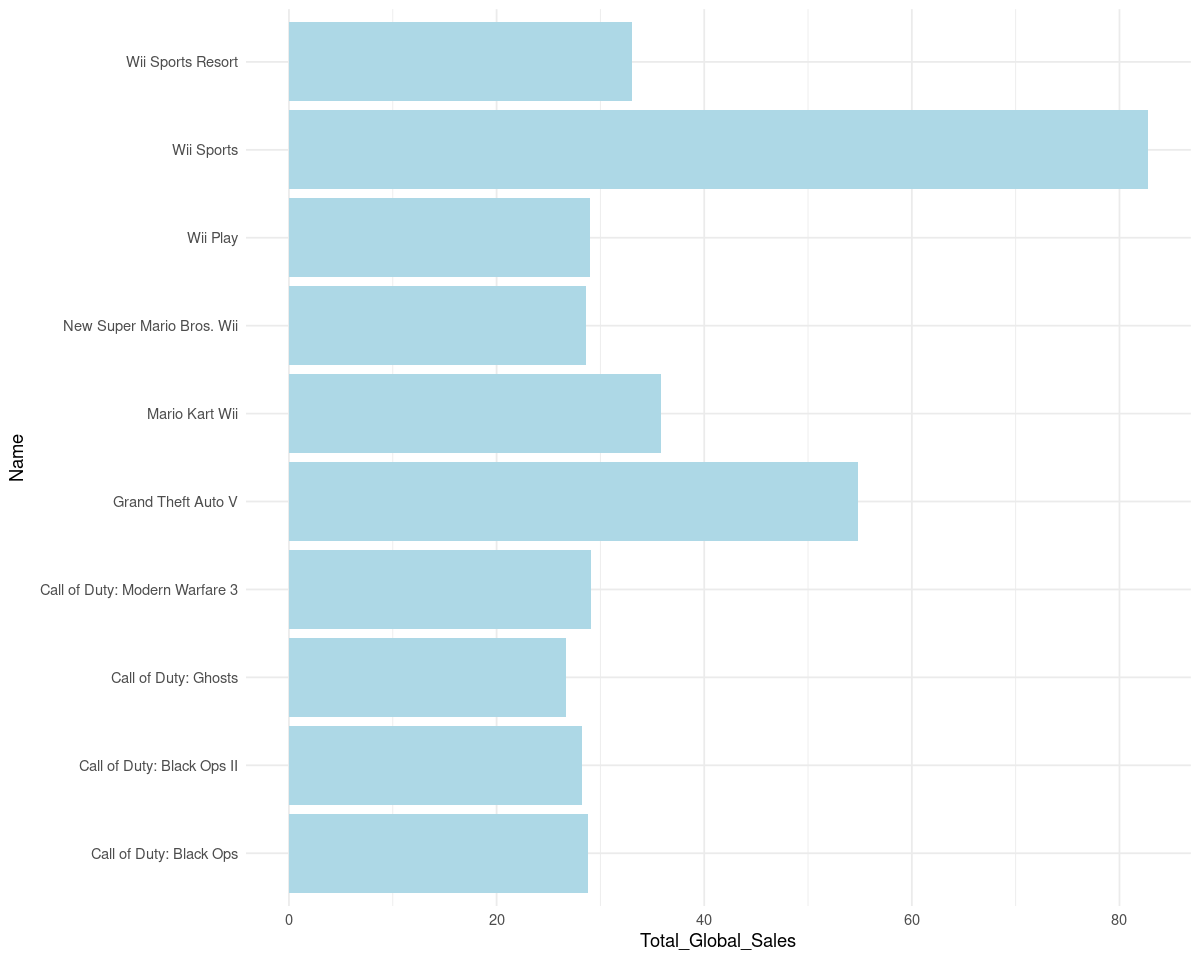

In [7]:
# Redraw the previous plot
# Use flipped coordinates
ggplot(top_global_sales_by_name, aes(x= Total_Global_Sales, y= Name))+
	geom_col(fill="lightblue") + 
	theme_minimal()


Currently the bars are ordered by alphabetical name of the game. It's easier to read the plot if the bars are ordered from longest to shortest.

#### Instructions

- Mutate `top_global_sales_by_name` so `Name` is reordered by `Total_Global_Sales`. Assign to `top_global_sales_by_name_ordered`.
- Redraw the previous plot.

Name,Total_Global_Sales
<fct>,<dbl>
Wii Sports,82.74
Grand Theft Auto V,54.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00
Call of Duty: Modern Warfare 3,29.11
Wii Play,29.02


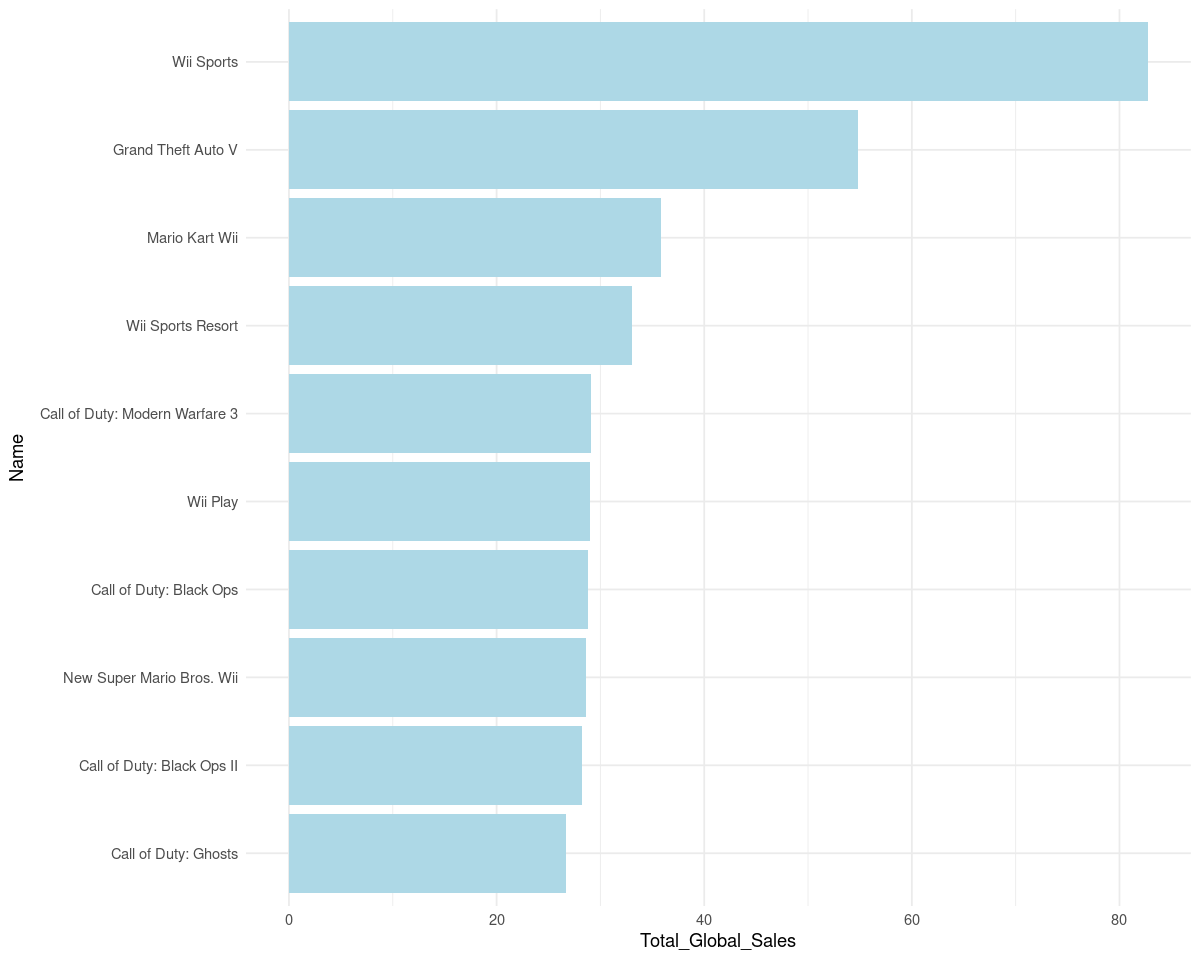

In [8]:
# Mutate top_global_sales_by_name so Name is reordered by Total_Global_Sales
top_global_sales_by_name_ordered <- top_global_sales_by_name %>%
	mutate(Name = fct_reorder(Name, Total_Global_Sales))
	
head(top_global_sales_by_name_ordered)
# Redraw the previous plot
ggplot(top_global_sales_by_name_ordered, aes(x= Total_Global_Sales, y= Name))+
	geom_col(fill="lightblue") + 
	theme_minimal()


## Drawing line plots

To explore questions around how numeric metrics change from year to year line plots are ideal.

For simplicity, let's first look at the 7th generation of consoles. We need to filter the dataset.

#### Instructions

- Using `vgsales`, filter for rows where `Platform_Generation` is equal to `"7th"`. Assign to `seventh_generation`.

In [9]:
# Using vgsales, filter for rows where Platform_Generation is equal to "7th"
seventh_generation <- vgsales %>%
	filter(Platform_Generation ==  "7th")



# See the result
seventh_generation

Name,Year,Platform,Platform_Generation,Platform_Company,NA_Sales,EU_Sales,JP_Sales,Global_Sales
<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Wii Sports,2006,Wii,7th,Nintendo,41.49,29.02,3.77,82.74
Mario Kart Wii,2008,Wii,7th,Nintendo,15.85,12.88,3.79,35.82
Wii Sports Resort,2009,Wii,7th,Nintendo,15.75,11.01,3.28,33.00
Wii Play,2006,Wii,7th,Nintendo,14.03,9.20,2.93,29.02
New Super Mario Bros. Wii,2009,Wii,7th,Nintendo,14.59,7.06,4.70,28.62
Wii Fit,2007,Wii,7th,Nintendo,8.94,8.03,3.60,22.72
Wii Fit Plus,2009,Wii,7th,Nintendo,9.09,8.59,2.53,22.00
Kinect Adventures!,2010,X360,7th,Microsoft,14.97,4.94,0.24,21.82
Grand Theft Auto V,2013,PS3,7th,Sony,7.01,9.27,0.97,21.40


### What are the total yearly sales of the 7th gen games included in the dataset?

The 7th generation of consoles is widely considered to have run from 2005 to 2017. By looking at total sales by year, we can get a sense of when this generation peaked in popularity.

#### Instructions

- Using `seventh_generation`, group by `Year`, then summarize to calculate `Total_Global_Sales` as the sum of `Global_Sales`. Assign to `total_7th_gen_global_sales_by_year`.

In [10]:
# Using seventh_generation,  
# group by Year,  
# then summarize to calculate Total_Global_Sales as the sum of Global_Sales
total_7th_gen_global_sales_by_year <- seventh_generation %>%
	group_by(Year) %>%
	summarize(Total_Global_Sales = sum(Global_Sales)) %>%
	arrange(desc(Year))


# See the result
total_7th_gen_global_sales_by_year

Year,Total_Global_Sales
<int>,<dbl>
2016,3.42
2015,32.82
2014,91.82
2013,216.36
2012,233.14
2011,366.90
2010,447.27
2009,463.63
2008,429.61


Now we can visualize these sales over time with a line plot.

#### Instructions

- Using `total_7th_gen_global_sales_by_year`, plot `Total_Global_Sales` versus `Year`.
- Add a line geom. To make the line easier to see, set the size to `2`.

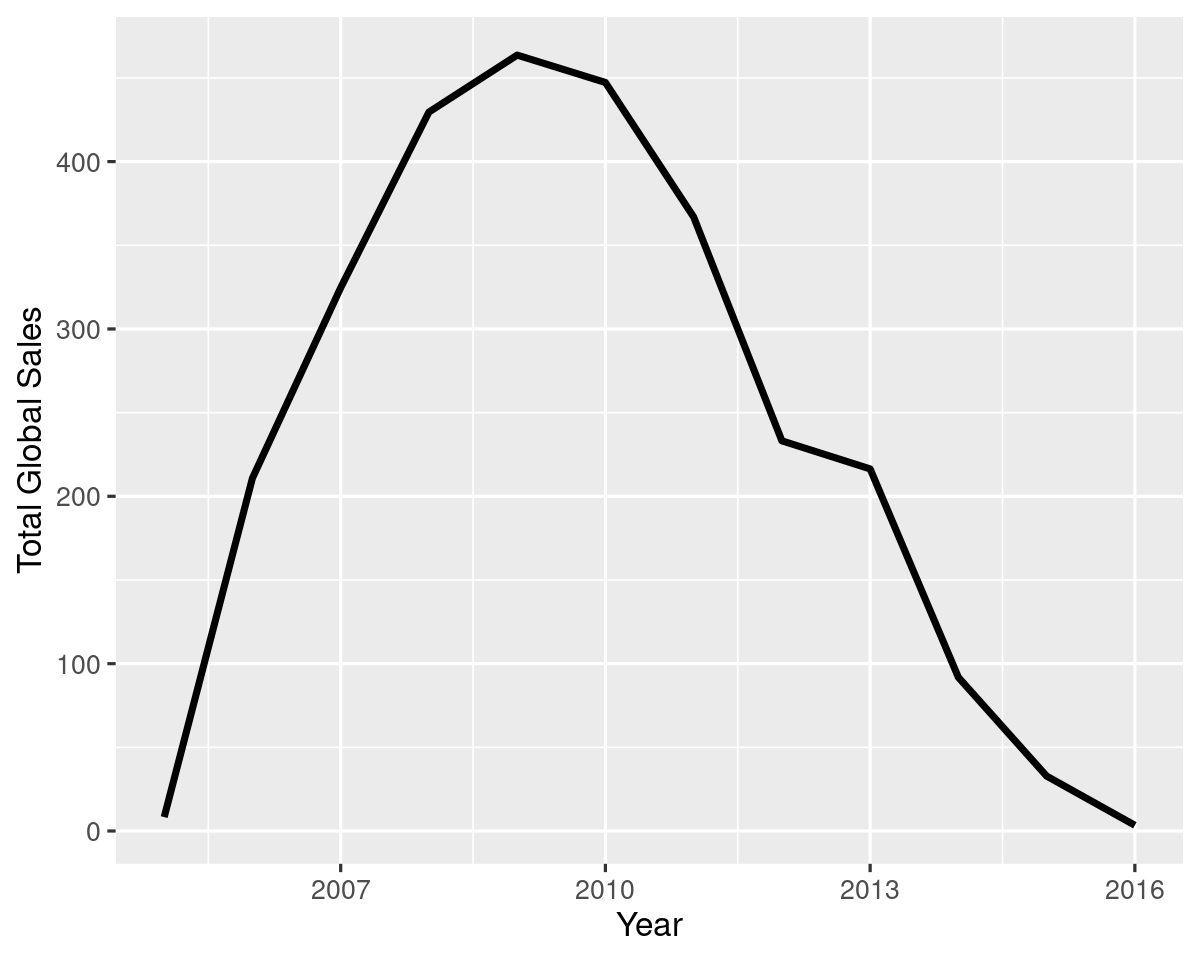

In [11]:
# Using total_7th_gen_global_sales_by_year, plot Total_Global_Sales versus Year
# Add a line geom with size 2
ggplot(total_7th_gen_global_sales_by_year, aes(x= Year, y= Total_Global_Sales)) +
	geom_line(linewidth = 2) +
	labs(x = "Year", y= "Total Global Sales") 



### What's the split of those games by platform?

Over all the 7th generation platforms, (based on the games in the dataset) the sales peaked in 2009. But the peak for individual platforms may have been in different years. We can explore this by drawing a separate line for each platform.

#### Instructions

- Using `seventh_generation`, group by `Year` and `Platform`, then summarize to calculate `Total_Global_Sales` as the sum of `Global_Sales`. Drop all groups from the summarization. Assign to `total_7th_gen_global_sales_by_year_platform`.
- Using `total_7th_gen_global_sales_by_year_platform`, plot `Total_Global_Sales` versus `Year`, colored by `Platform`.
- Add a line geom with size `2`.

Year,Platform,Total_Global_Sales
<int>,<chr>,<dbl>
2005,X360,8.32
2006,PS3,21.07
2006,Wii,137.91
2006,X360,51.88
2007,PS3,73.81
2007,Wii,154.97


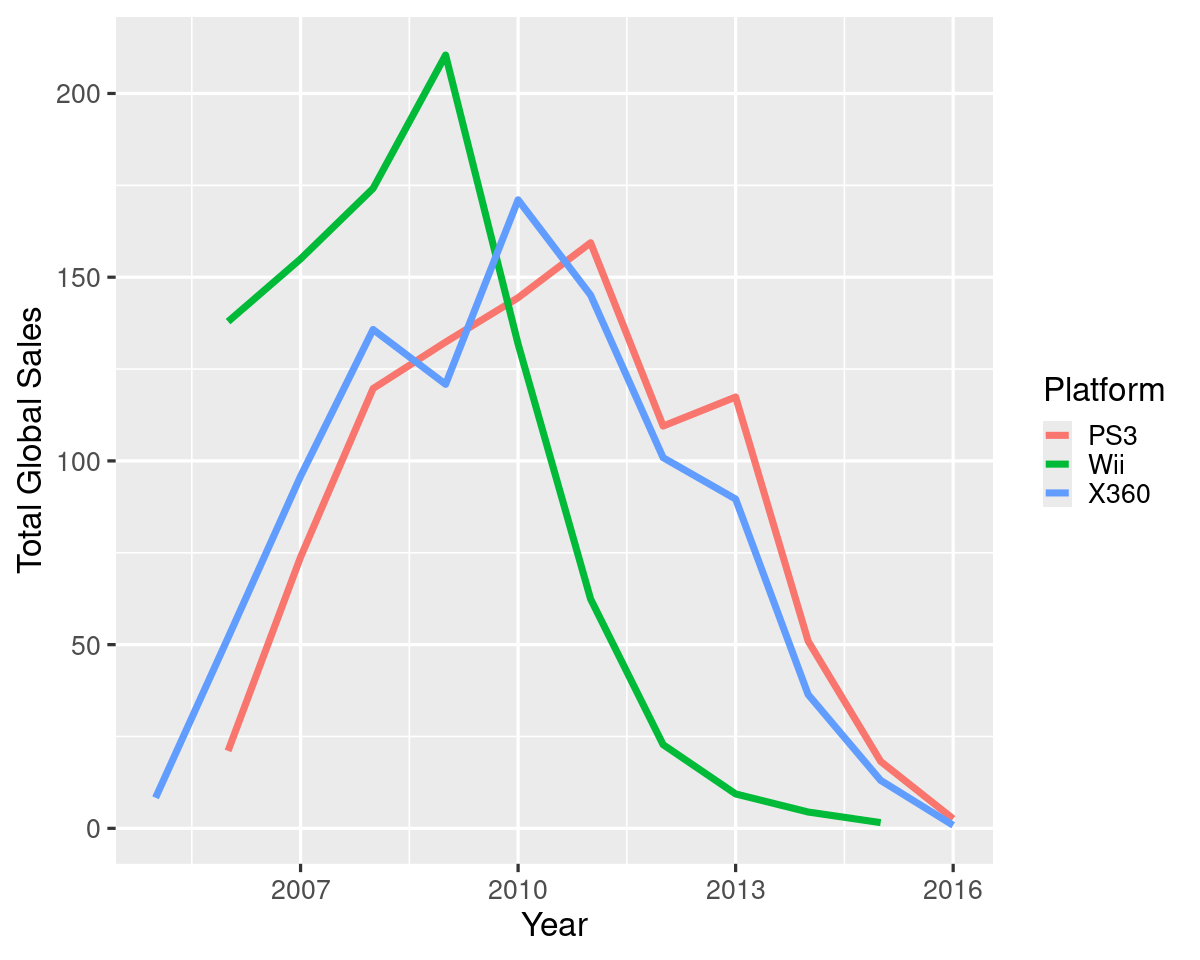

In [12]:
# Using seventh_generation,  
# group by Year and Platform,  
# then summarize to calculate Total_Global_Sales as the sum of Global_Sales
total_7th_gen_global_sales_by_year_platform <- seventh_generation %>%
	group_by(Year, Platform) %>%
	summarize(Total_Global_Sales = sum(Global_Sales), .groups="drop")

head(total_7th_gen_global_sales_by_year_platform)

# Using total_7th_gen_global_sales_by_year_platform, plot Total_Global_Sales versus Year, colored by Platform.
# Add a line geom with size 2
ggplot(total_7th_gen_global_sales_by_year_platform, aes(x= Year, y= Total_Global_Sales, color=Platform)) +
	geom_line(linewidth = 2) +
	labs(x = "Year", y= "Total Global Sales") 



How do you interpet this plot?

2009: Wii had the highest sales compared to the three platforms, but demand slowed down faster compared to the PS3 and X360. The other two consoles had relatively similar demand patterns.

### How can we visualize all generations together?

Let's try the same plot again with all the data from `vgsales`.

#### Instructions

- Rework the previous plot, but start with `vgsales`.

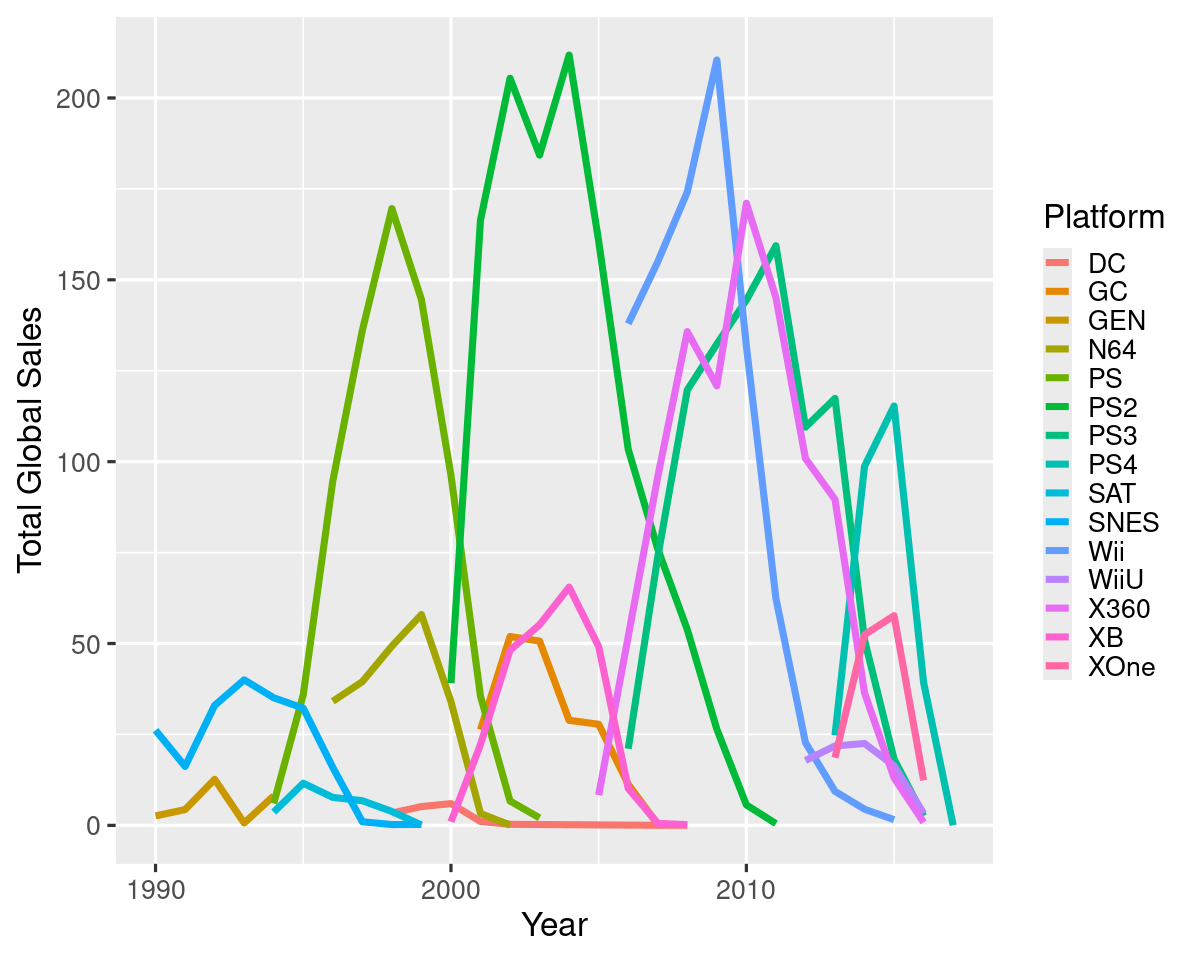

In [13]:
# Using vgsales, 
# group by Year and Platform,  
# then summarize to calculate Total_Global_Sales as the sum of Global_Sales
total_global_sales_by_year_platform <- vgsales %>%
	group_by(Year, Platform) %>%
	summarise(Total_Global_Sales = sum(Global_Sales), .groups="drop")


# Using total_global_sales_by_year_platform, plot Total_Global_Sales versus Year, colored by Platform.
# Add a line geom with size 2

ggplot(total_global_sales_by_year_platform, aes(x= Year, y= Total_Global_Sales, color=Platform)) +
	geom_line(linewidth = 2) +
	labs(x = "Year", y= "Total Global Sales") 



This is really messy! With so many colors it is hard to tell what is going on. The plot can be made clearer by using one color for each company, and by plotting each generation in its own panel.

#### Instructions

- Using `vgsales`, group by `Year`, `Platform_Company` and `Platform_Generation`, then summarize to calculate `Total_Global_Sales` as the sum of `Global_Sales`. Drop all groups from the summarization. Assign to `total_global_sales_by_year_platform`.
- Using `total_global_sales_by_year_platform`, plot `Total_Global_Sales` versus `Year`, colored by `Platform_Company`.
- Add a line geom with size `2`.
- Facet the plot, wrapping by `Platform_Generation`.

`summarise()` has grouped output by 'Year', 'Platform_Company'. You can
override using the `.groups` argument.


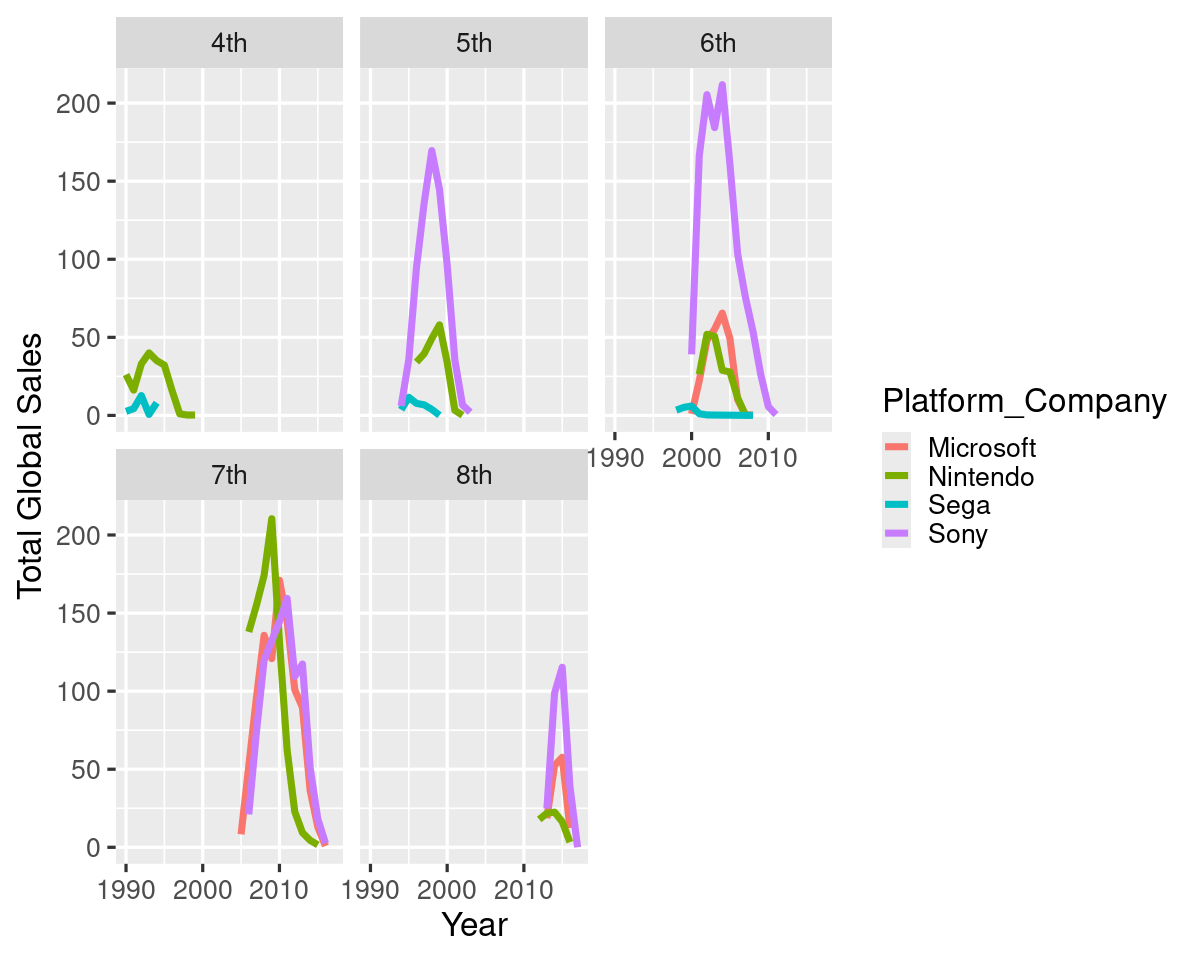

In [14]:
# Using vgsales, 
# group by Year, Platform_Company and Platform_Generation, 
# then summarize to calculate Total_Global_Sales as the sum of Global_Sales
total_global_sales_by_year_platform <- vgsales %>%
	group_by(Year, Platform_Company, Platform_Generation) %>%
	summarize(Total_Global_Sales = sum(Global_Sales), .ungroup = "drop")


# Using total_global_sales_by_year_platform, plot Total_Global_Sales versus Year, colored by Platform_Company
# Add a line geom with size 2
# Facet the plot, wrapping by Platform_Generation.
ggplot(total_global_sales_by_year_platform, aes(x= Year, y= Total_Global_Sales, color=Platform_Company)) +
	geom_line(linewidth = 2) +
	labs(x = "Year", y= "Total Global Sales") +
	facet_wrap(~ Platform_Generation)




This is much clearer, but it's a bit tricky to compare timelines for generations that are side by side. It would be easier to see what is happening if we put all the panels in a single column.

#### Instructions

- Redraw the same plot, with 1 column in the facetting.

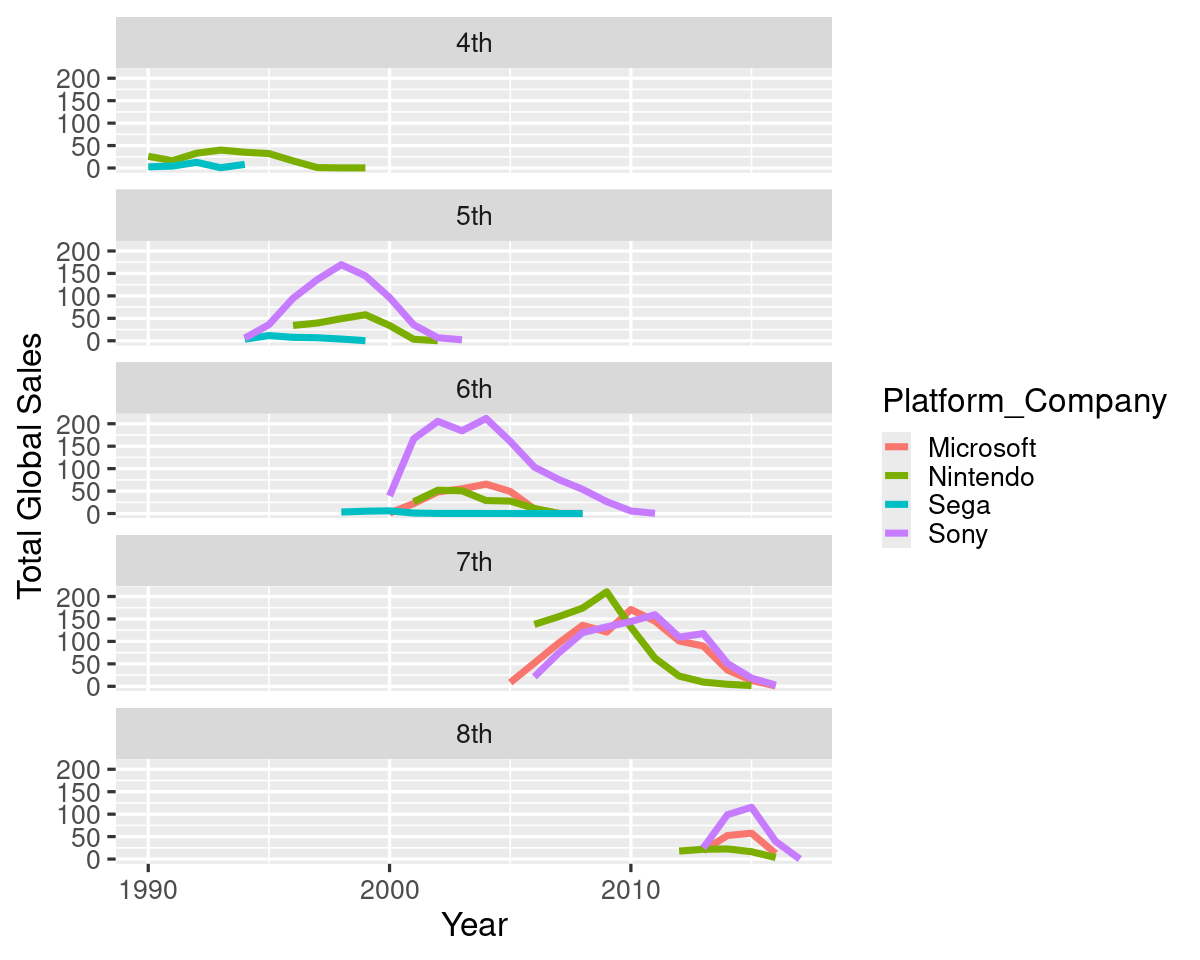

In [16]:
# Redraw the same plot, with 1 column in the facetting
ggplot(total_global_sales_by_year_platform, aes(x= Year, y= Total_Global_Sales, color=Platform_Company)) +
	geom_line(linewidth = 2) +
	labs(x = "Year", y= "Total Global Sales") +
	facet_wrap(~ Platform_Generation, ncol = 1)

